**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Fernando Abel Leal Villacicencio
*   MATRÍCULA: A01796859
*   NOMBRE: Carlos Isaac Sagrero Campos
*   MATRÍCULA: A01796826
*   NOMBRE: Oscar F Barajas Matxo
*   MATRÍCULA: A01350763

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [33]:
cars_df = pd.read_csv('vehicles.csv')
cars_df.head()
rg = cars_df.shape[0]

In [34]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [35]:
cars_df.drop(['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long'], axis=1, inplace=True)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 non-null       float64
 17  state         426880 non-null  object 
dtypes: f

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [36]:
Num_columnas = cars_df.shape[1]
Num_registros = cars_df.shape[0]

## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [37]:
Porcentaje = cars_df.isna().mean()*100
Porcentaje


region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
dtype: float64

In [38]:
thresh_value = int(Num_registros * 0.7)
cars_df.dropna(axis=1, thresh=thresh_value, inplace=True)
print ('El numero de columnas eliminadas es:', Num_columnas - cars_df.shape[1])

El numero de columnas eliminadas es: 6


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [39]:
Col_Check = Porcentaje[Porcentaje < 5].index.tolist()
cars_df.dropna(axis=0, subset=Col_Check, inplace=True)
porcentaje = (Num_registros - cars_df.shape[0]) / Num_registros
print(f'El porcentaje de registros eliminados es: {porcentaje:.2%}')

El porcentaje de registros eliminados es: 8.73%


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [40]:
cars_df.isna().mean()*100

region           0.000000
region_url       0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
type            21.208201
state            0.000000
dtype: float64

In [41]:
cars_df['type'] = cars_df['type'].fillna(cars_df['type'].mode()[0])
cars_df.isna().mean()*100

region          0.0
region_url      0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
type            0.0
state           0.0
dtype: float64

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

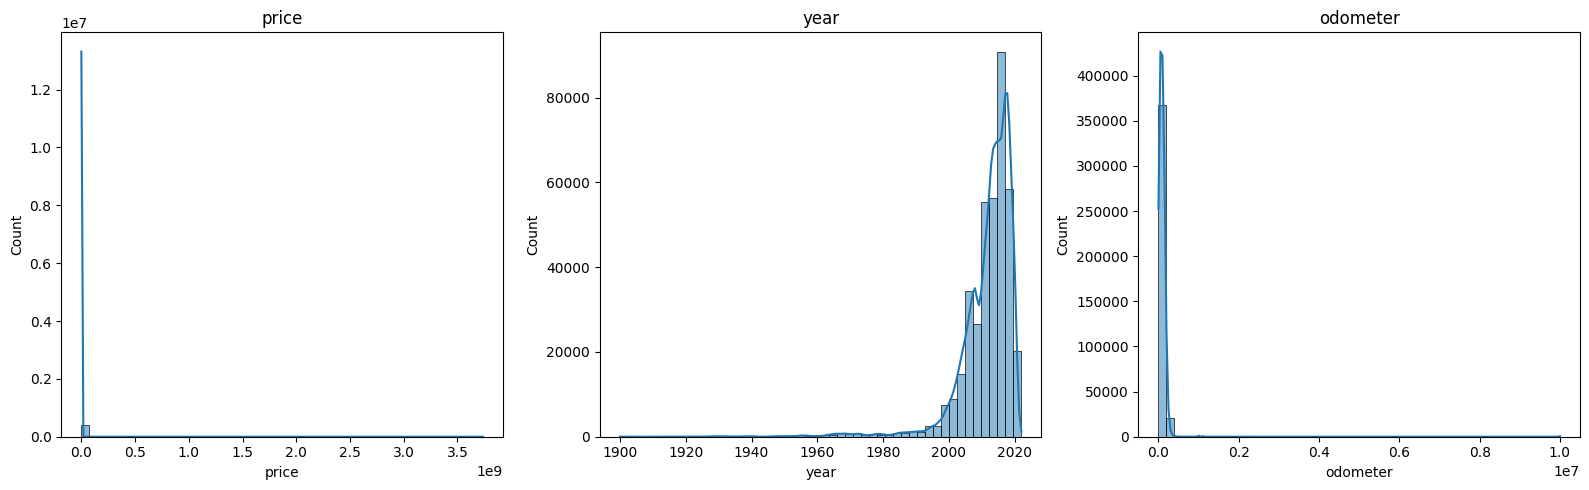

In [42]:
cols = ['price', 'year', 'odometer']
fig, ax = plt.subplots(1,3, figsize=(16,5))
for col,ax in zip(cars_df[cols], ax):
    sns.histplot(cars_df[col], bins=50, ax=ax, kde=True)
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [43]:
cars_df['age'] = abs(cars_df.year -  pd.to_datetime('today').year)
cars_df.drop('year', axis=1, inplace=True)

Text(0.5, 1.0, 'Age')

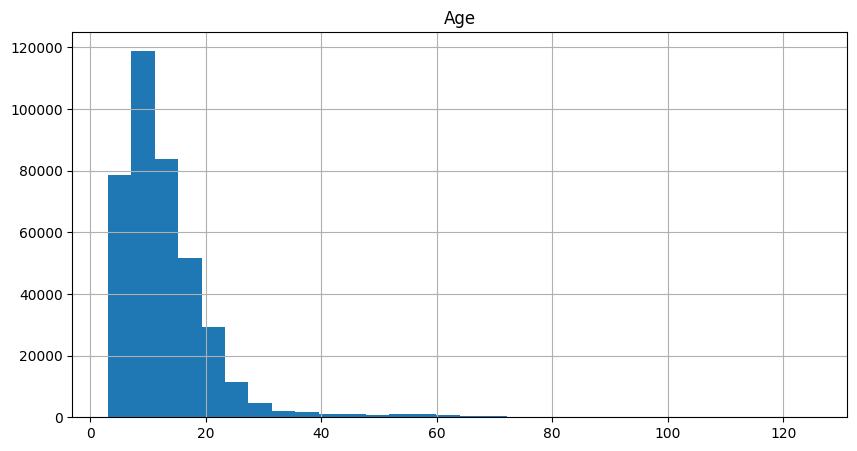

In [44]:
cars_df['age'].hist(bins=30, figsize=(10,5))
plt.title('Age')

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

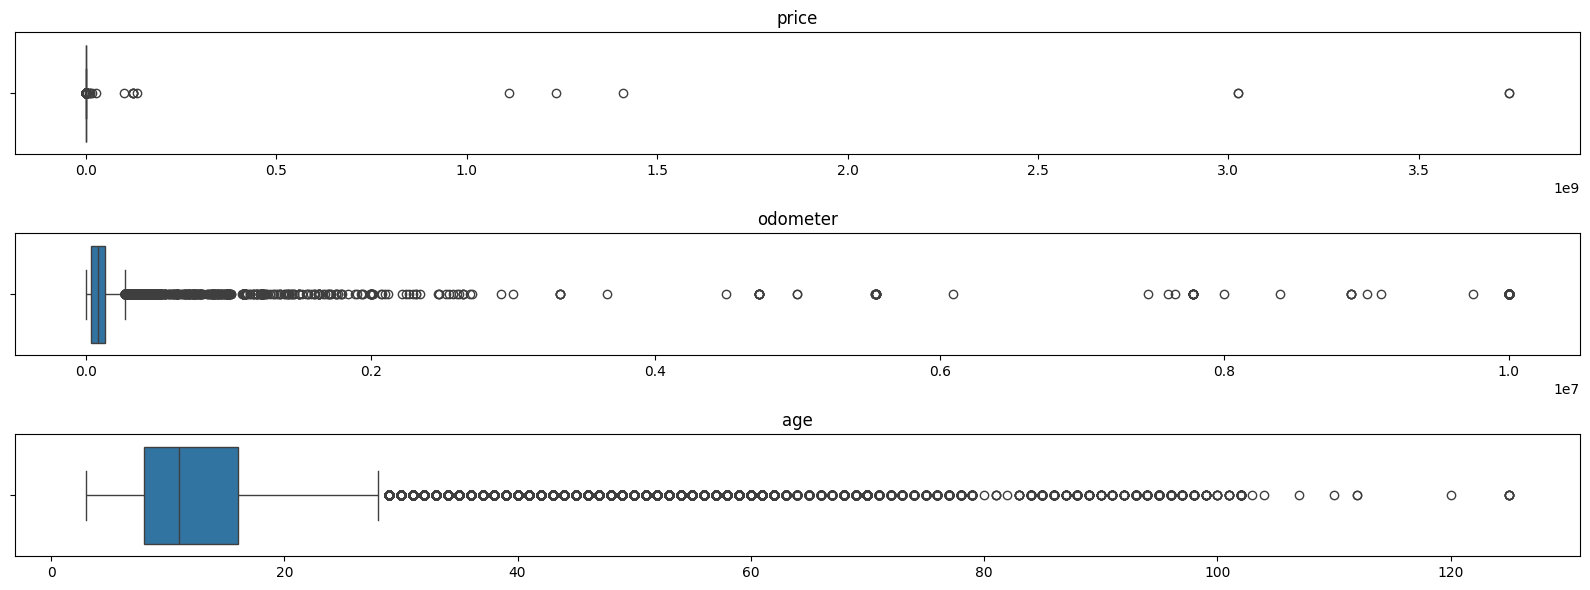

In [45]:
Box_columnas = cars_df[['price', 'odometer', 'age']]
fig, axes = plt.subplots(3, 1, figsize=(16, 6))
axes = axes.ravel()

for i, col in enumerate(Box_columnas, 0):
    sns.boxplot(x=col, data=cars_df, ax=axes[i], orient='y')
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [46]:
cars_df_clean = cars_df.copy()
IQR_Columnas = ['price', 'odometer', 'age']

outliers_df = pd.DataFrame() 

for col in IQR_Columnas:
    Q1 = cars_df_clean[col].quantile(0.25)
    Q3 = cars_df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    IQR_outliers = cars_df_clean[(cars_df_clean[col] < limite_inferior) | (cars_df_clean[col] > limite_superior)]
    
    outliers_df = pd.concat([outliers_df, IQR_outliers]) 
    
    print(f'Outliers en {col}: {IQR_outliers.shape[0]} ({IQR_outliers.shape[0] / cars_df_clean.shape[0] * 100:.2f}%)')


cars_df_clean = cars_df_clean[~cars_df_clean.index.isin(outliers_df.index)]


print(f'Total de outliers detectados: {outliers_df.shape[0]}')
print(f'Tamaño del DataFrame limpio: {cars_df_clean.shape[0]}')
print(f'Porcentaje Total de registros eliminados: {((rg-cars_df_clean.shape[0])/rg):.2%}')

Outliers en price: 6656 (1.71%)
Outliers en odometer: 3226 (0.83%)
Outliers en age: 14209 (3.65%)
Total de outliers detectados: 24091
Tamaño del DataFrame limpio: 366328
Porcentaje Total de registros eliminados: 14.18%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

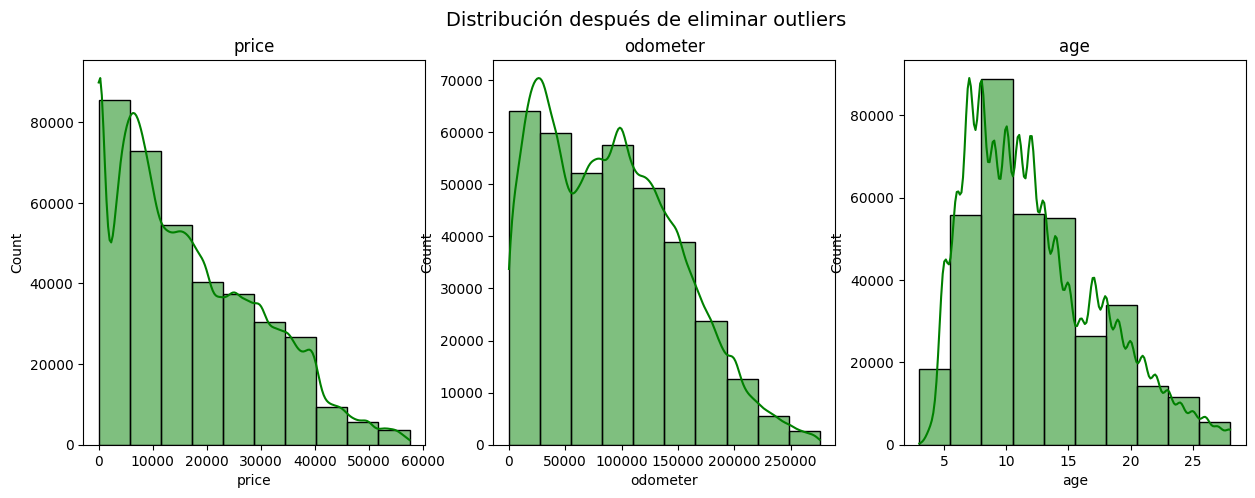

In [47]:
# 🔹 Graficar histogramas después de la limpieza
fig, axes = plt.subplots(1, len(IQR_Columnas), figsize=(15, 5))
fig.suptitle("Distribución después de eliminar outliers", fontsize=14)

for i, col in enumerate(IQR_Columnas):
    sns.histplot(cars_df_clean[col], bins=10, kde=True, ax=axes[i], color='green')

    axes[i].set_title(col)

plt.show()


# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


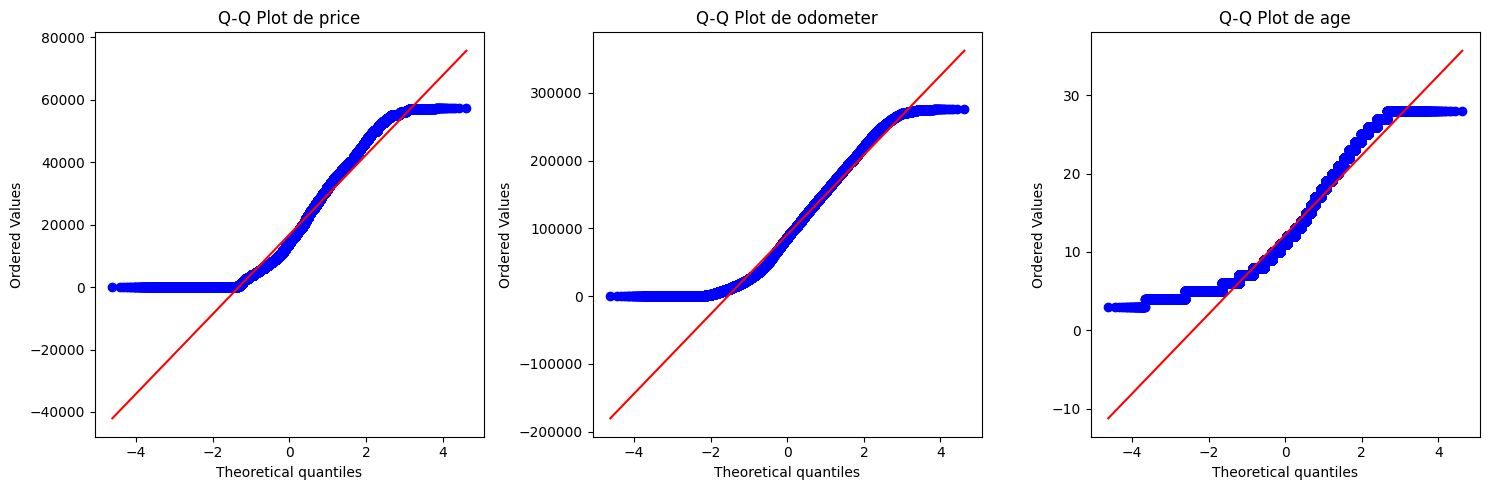

In [48]:
Columnas = cars_df_clean[['price', 'odometer', 'age']]


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(Columnas.columns):
    stats.probplot(Columnas[col], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot de {col}")

plt.tight_layout()
plt.show()


Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [49]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, OneHotEncoder
from category_encoders.binary import BinaryEncoder


In [50]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
transf_df = pd.DataFrame(transformer.fit_transform(Columnas), columns=Columnas.columns, index=cars_df_clean.index)
transf_df.head()

,price,odometer,age
27,194.933364,623.675987,2.322289
28,164.326657,695.994731,2.571180
29,209.204110,346.526341,1.706149
30,188.293578,519.996769,2.069421
31,137.708592,949.705360,2.391936


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

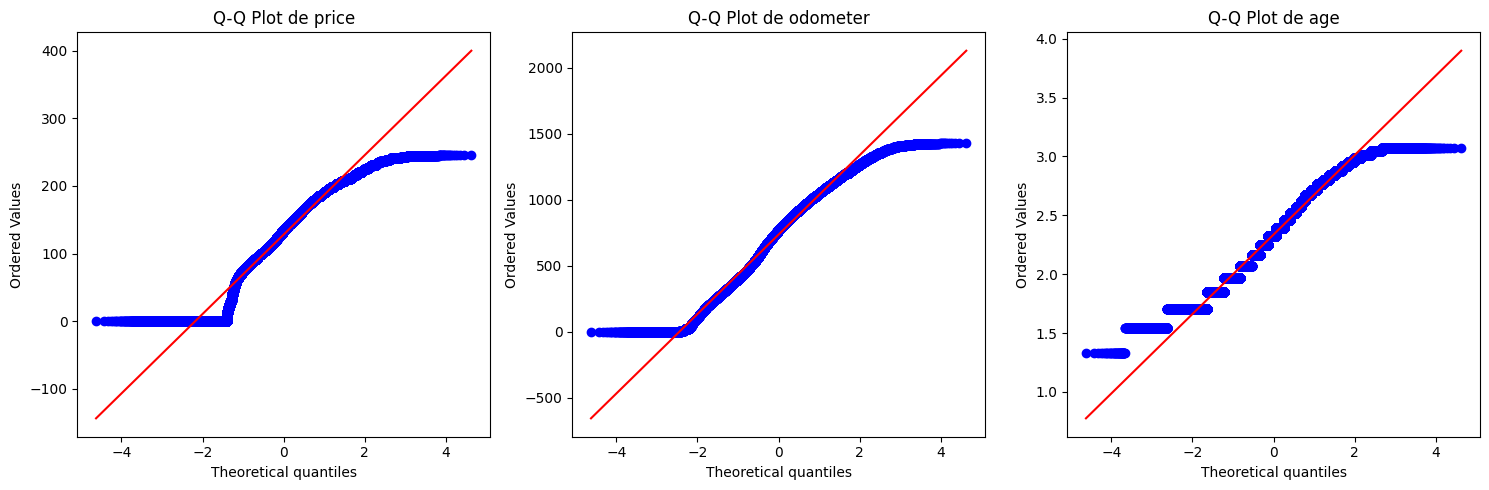

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(transf_df.columns):
    stats.probplot(transf_df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot de {col}")

plt.tight_layout()
plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [52]:
scaler = MinMaxScaler()
minmax_df = pd.DataFrame(scaler.fit_transform(transf_df),columns=transf_df.columns, index=cars_df_clean.index)
minmax_df

,price,odometer,age
27,0.794060,0.437060,0.568026
28,0.669384,0.487739,0.711175
29,0.852192,0.242839,0.213656
30,0.767013,0.364403,0.422590
31,0.560956,0.665534,0.608083
...,...,...,...
426875,0.681997,0.320145,0.293639
426876,0.762738,0.189543,0.213656
426877,0.808127,0.107714,0.213656
426878,0.745306,0.308810,0.362377


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

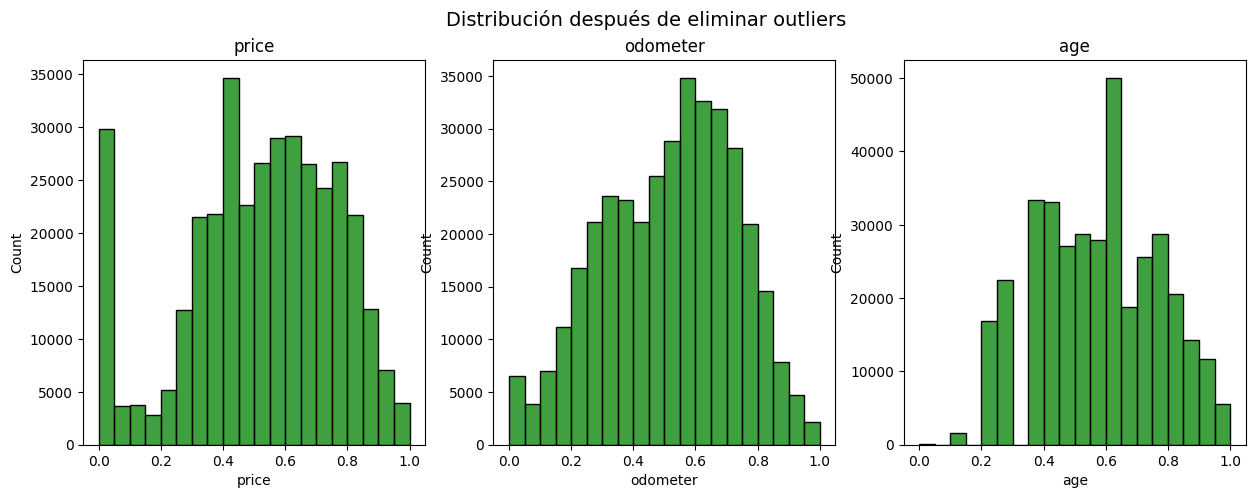

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Distribución después de eliminar outliers", fontsize=14)

for i, col in enumerate(minmax_df.columns):
    sns.histplot(minmax_df[col], bins=20, ax=axes[i], color='green')

    axes[i].set_title(col)

plt.show()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [54]:
cars_df_clean.select_dtypes('object').describe().T


,count,unique,top,freq
region,366328,404,columbus,3188
region_url,366328,413,https://grandrapids.craigslist.org,2737
manufacturer,366328,40,ford,61660
model,366328,19097,f-150,7436
fuel,366328,5,gas,312085
title_status,366328,6,clean,354717
transmission,366328,3,automatic,291628
type,366328,13,sedan,154259
state,366328,51,ca,42062


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [55]:
low = cars_df_clean.select_dtypes('object').nunique()
lower = low [ low < 100].index.tolist()

up = cars_df_clean.select_dtypes('object').nunique()
upper = up [ up > 100].index.tolist()


highly_cardinal_variables = cars_df_clean[upper]
few_cardinal_variables = cars_df_clean[lower]


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

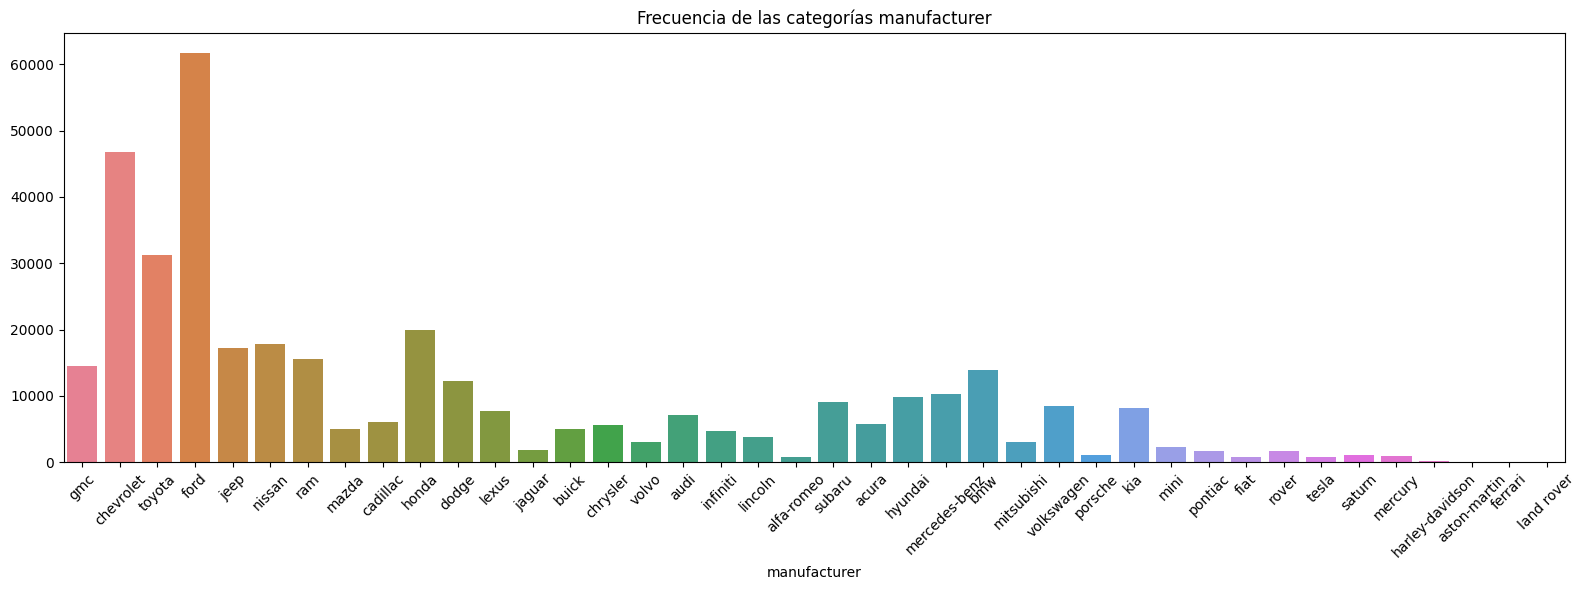

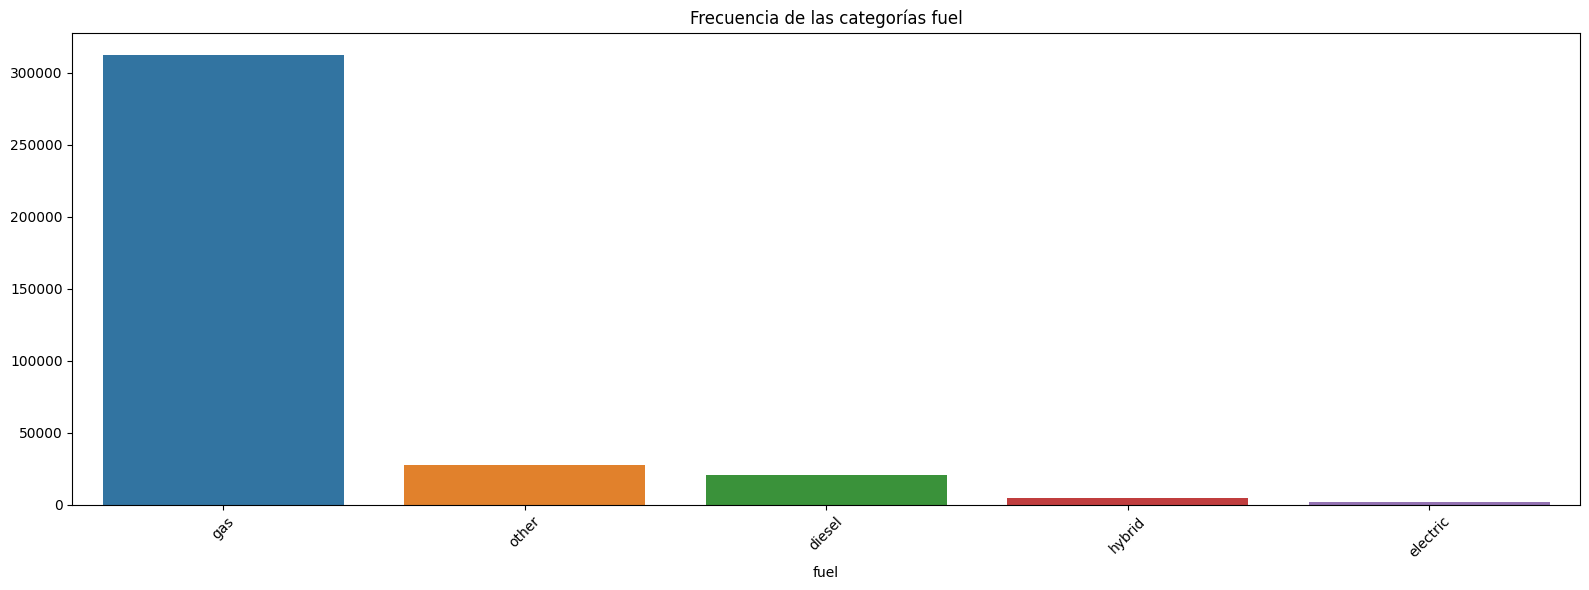

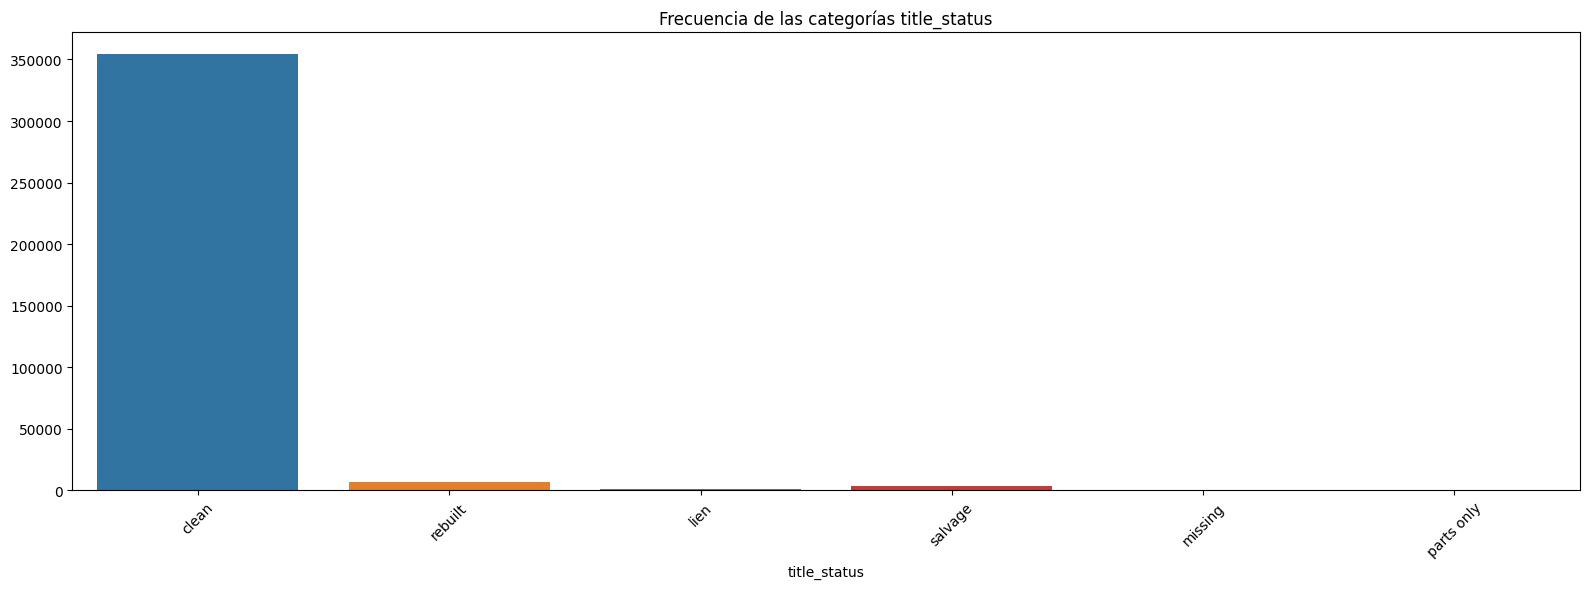

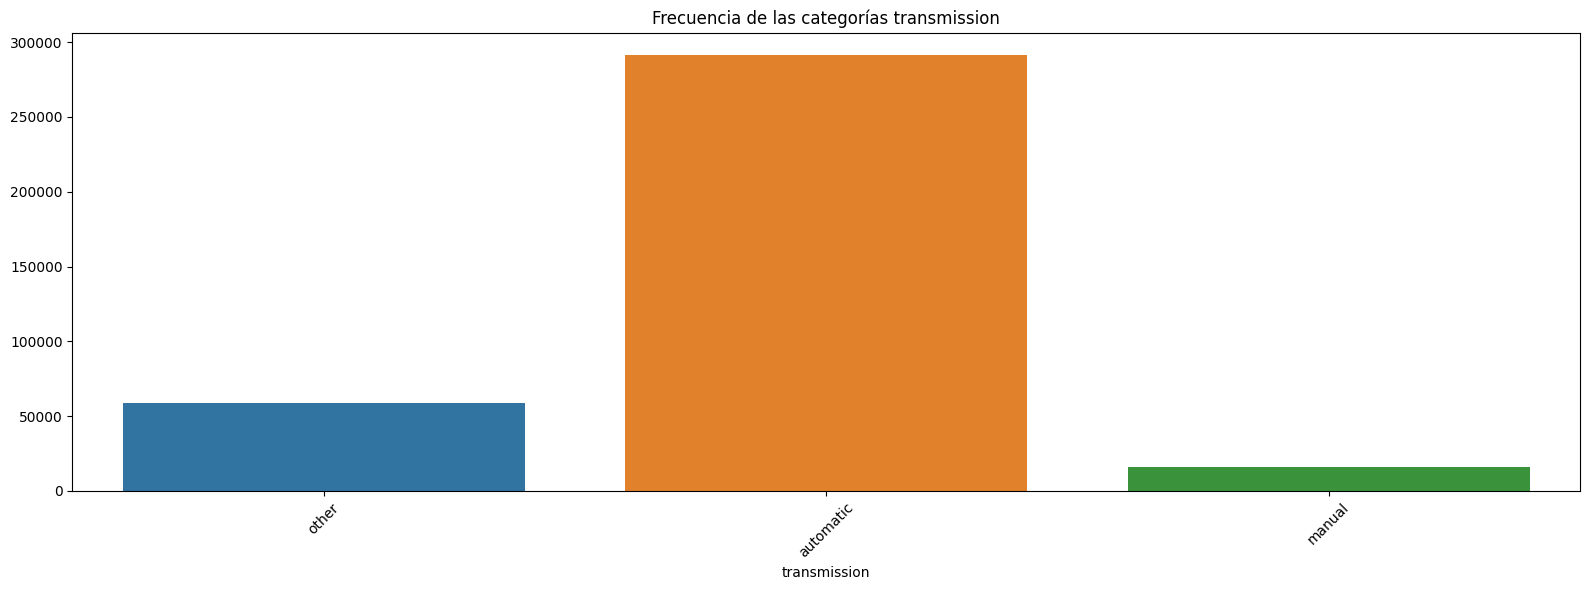

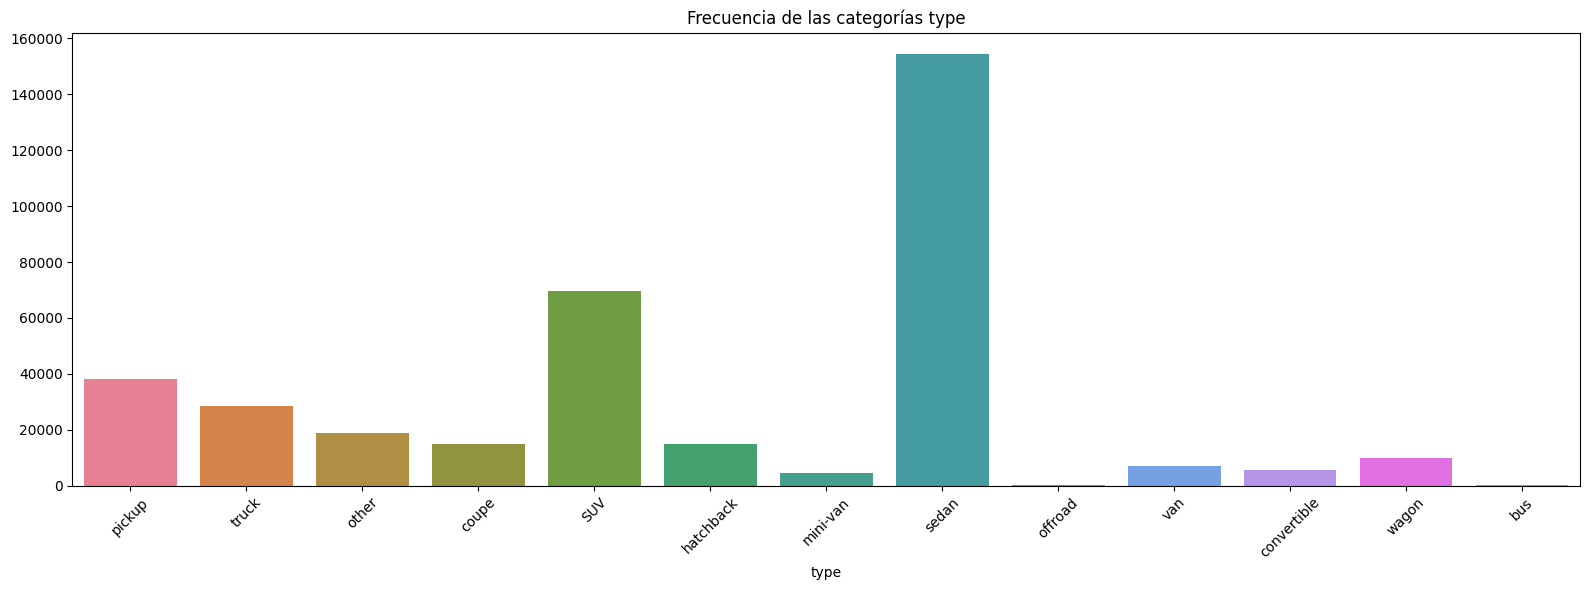

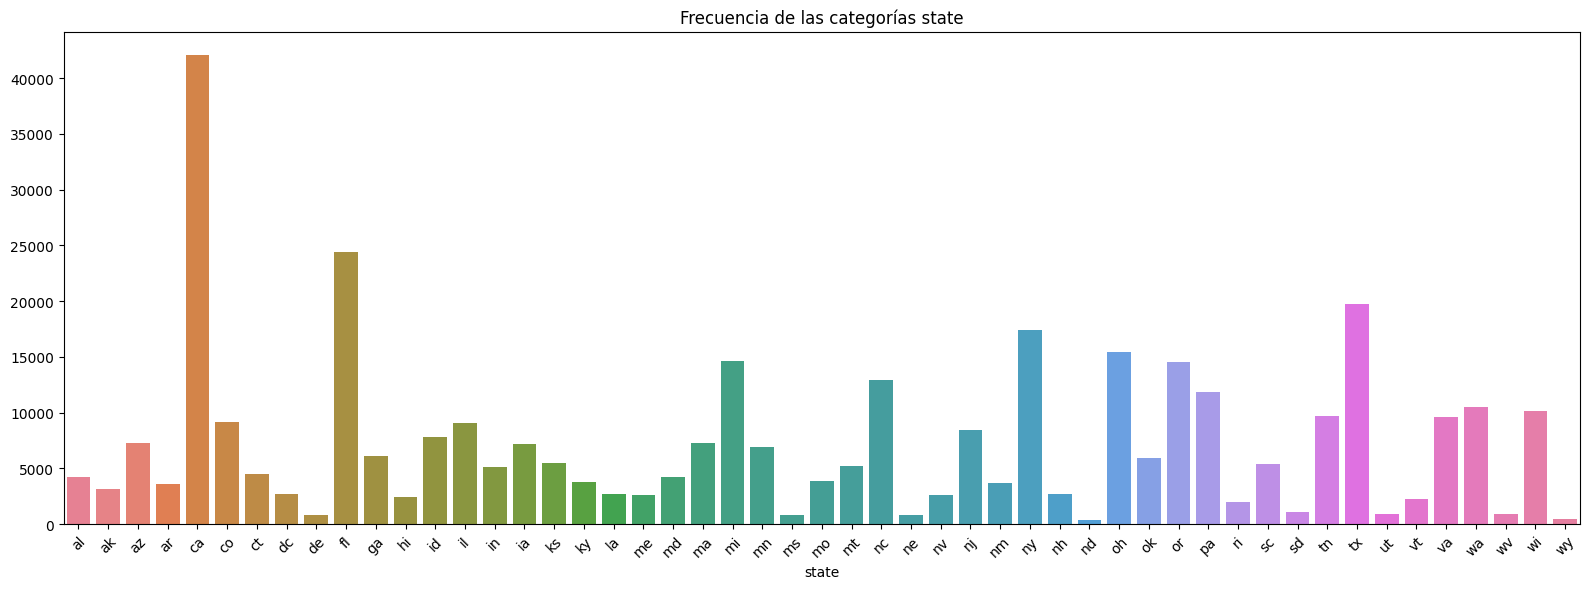

In [56]:
for col in few_cardinal_variables.columns:
    plt.figure(figsize=(16, 6))
    sns.countplot(data=cars_df_clean, x=col, hue=col)
    plt.title(f'Frecuencia de las categorías {col}')
    plt.xticks(rotation=45)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()


8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [57]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(few_cardinal_variables)

columns = encoder.get_feature_names_out(few_cardinal_variables.columns)
onehot_df = pd.DataFrame(encoded_data, columns=columns, index=few_cardinal_variables.index)
onehot_df


,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
426876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
426877,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
426878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [58]:
encoder = BinaryEncoder()
binary_df = encoder.fit_transform(highly_cardinal_variables)
binary_df

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,0
426876,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [59]:
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)

concatenated_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)
concatenated_df

,price,odometer,age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.794060,0.437060,0.568026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.669384,0.487739,0.711175,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.852192,0.242839,0.213656,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,0.767013,0.364403,0.422590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.560956,0.665534,0.608083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366323,0.681997,0.320145,0.293639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,1,0
366324,0.762738,0.189543,0.213656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,1,1
366325,0.808127,0.107714,0.213656,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,1,1
366326,0.745306,0.308810,0.362377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,1,1,0,1
